In [118]:
import pandas as pd
import numpy as np
import seaborn
from matplotlib import pyplot as plt
%matplotlib inline

from os import getcwd, sep

In [119]:
root = getcwd() + sep

ocean_file = root + 'ocean_safe.csv'
coronadelicos_file = root + 'coronadelicos_safe.csv'

In [120]:
ocean_df = pd.read_csv(ocean_file)
coronadelicos_df = pd.read_csv(coronadelicos_file)

In [121]:
df_merge = pd.merge(ocean_df, coronadelicos_df, how='inner', on='hash')
print(df_merge.shape)

(8236, 196)


In [122]:
df_marihuana = df_merge[df_merge['7_marihuana'] > 0].copy()
df_marihuana.shape

(3282, 196)

In [123]:
df_no_marihuana = df_merge[df_merge['7_marihuana'] == -999].copy()
df_no_marihuana.shape

(3054, 196)

In [124]:
df_saa = df_merge[(df_merge['7_antidepresivos o antipsicoticos'] > 0) & (df_merge['7_sedativos'] != -999)].copy()
df_saa.shape

(366, 196)

In [125]:
columnas = ['1_extraversion', '1_agreeableness', '1_conscientiousness', '1_neuroticism', '1_openness']

df_marihuana = df_marihuana[columnas].copy()
df_no_marihuana = df_no_marihuana[columnas].copy()
df_saa = df_saa[columnas].copy()

In [126]:
def radar_plot(df, title = '',):
    categories = df.columns
    N = len(categories)
    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * np.pi for n in range(N)]
    angles += angles[:1]
     
    # Initialise the spider plot
    fig, ax = plt.subplots(figsize = (6,6), subplot_kw = {'projection': 'polar'})
     
    # If you want the first axis to be on top:
    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)
     
    # Draw one axe per variable + add labels labels yet
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories,
                       fontsize = 12)
     
    # Draw ylabels
    ax.set_rlabel_position(0)
    ax.set_yticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
    ax.set_yticklabels(["0.1","0.2","0.3","0.4","0.5","0.6", "0.7", "0.8", "0.9", "1"],
                       color = "darkgrey",
                       size = 7)
    ax.set_ylim(0,1)
    
    # ------- PART 2: Add plots
    
    # Plot each individual = each line of the data
    
    for row in df.iloc:
            values = row.values.flatten().tolist()
            values += values[:1]
            ax.plot(angles, values, linewidth=1.5, linestyle = 'solid', label = row.name)
            ax.fill(angles, values, 'b', alpha=0.1)
    # Add legend
    ax.legend(loc=(-0.2,-0.3),fontsize=12)
    ax.set_title(title, position=(.5, 1.2),fontsize=15,)

In [141]:
index = ['Marihuana', 'No Marihuana', 'Drogas de prescripción']
df = pd.DataFrame(data=[df_marihuana.mean(),
                        df_no_marihuana.mean(),
                        df_saa.mean()],
                  index=index)
#df.columns = ['E', 'A', 'C', 'N', 'O']

df = df / df.to_numpy().max()

C:\Users\facun\AppData\Local\Temp\ipykernel_12960\3450548125.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df = pd.DataFrame(data=[df_marihuana.mean(),
C:\Users\facun\AppData\Local\Temp\ipykernel_12960\3450548125.py:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_no_marihuana.mean(),
C:\Users\facun\AppData\Local\Temp\ipykernel_12960\3450548125.py:4: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' i

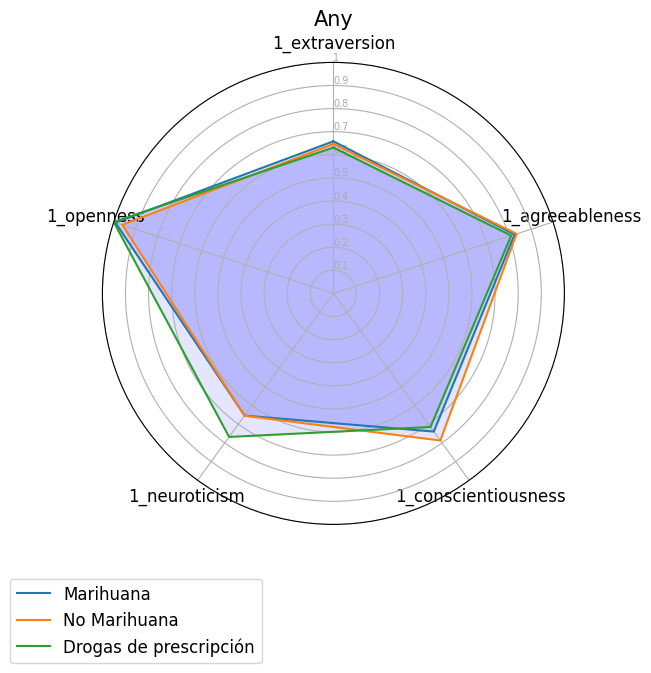

In [142]:
radar_plot(df, 'Any')

In [143]:
df_marihuana['grupo'] = 'Marihuana'
df_no_marihuana['grupo'] = 'No Marihuana'
df_saa['grupo'] = 'Drogas de prescripción'

In [144]:
df_m_nm = pd.concat([df_marihuana, df_no_marihuana])
df_m_nm

,1_extraversion,1_agreeableness,1_conscientiousness,1_neuroticism,1_openness,grupo
0,34,40,44,8,38,Marihuana
9,29,31,28,24,34,Marihuana
11,19,42,36,27,35,Marihuana
12,24,25,23,36,35,Marihuana
15,17,23,33,26,34,Marihuana
...,...,...,...,...,...,...
8209,15,35,25,30,36,No Marihuana
8217,38,32,38,23,43,No Marihuana
8218,34,32,37,26,39,No Marihuana
8223,19,36,39,24,38,No Marihuana


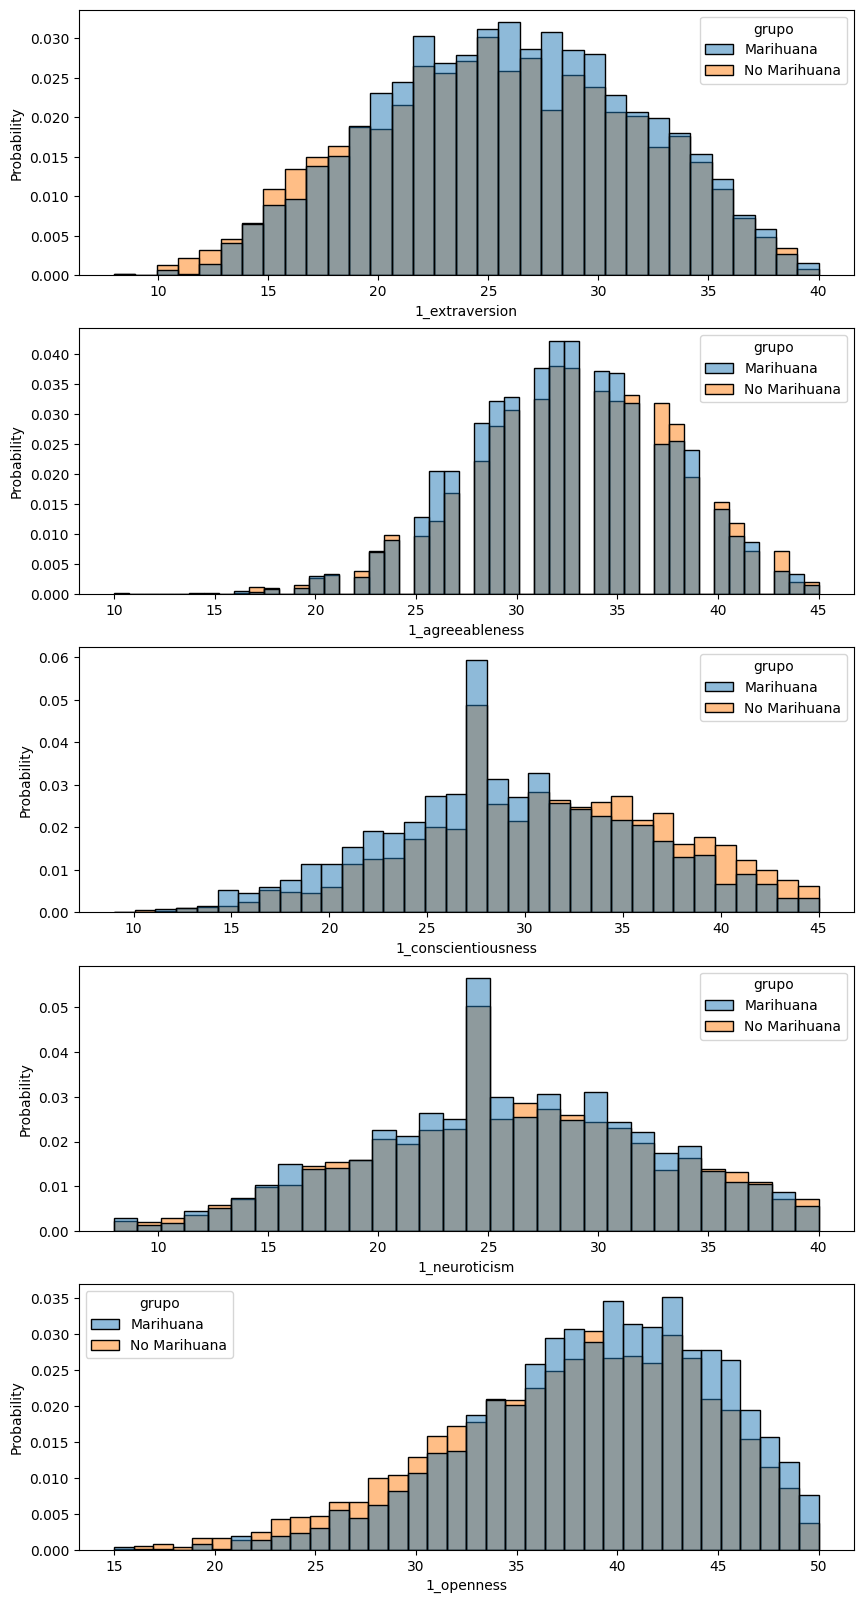

In [145]:
fig, ax = plt.subplots(nrows=5, ncols=1, figsize=(10, 20))
for i, c in enumerate(columnas):
    seaborn.histplot(data=df_m_nm, x=c, hue='grupo', stat='probability', ax=ax[i])
plt.show()

In [149]:
def d_coen(g1:pd.DataFrame, g2:pd.DataFrame):
    return (g1.mean() - g2.mean()) / (((((g1.std())**2)+((g2.std())**2))/2)**(1/2))

In [150]:
d = d_coen(df_marihuana['1_conscientiousness'], df_no_marihuana['1_conscientiousness'])
d

-0.28714614651594006